In [37]:
# 사이트에 자료 요청용 라이브러리 임포트
import urllib.request
# json 데이터 핸들링용
import json
import xml
import pandas as pd
# json 데이터를 pandasDataFrame 변환
from pandas.io.json import json_normalize
import numpy as np

In [2]:
key = "697a686c426c6368353144556c6e4e"
request_url = "http://openapi.seoul.go.kr:8088/%s/json/TbCorona19CountStatus/1/1000/" % (key) 

In [3]:
result = urllib.request.urlopen(request_url)

In [5]:
#얻어진 데이터의 json만 뽑기 위해 .read()를 사용합니다
json_raw = result.read()

In [7]:
json_utf8 = json_raw.decode("utf-8")

In [8]:
json_utf8

'{"TbCorona19CountStatus":{"list_total_count":941,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"S_DT":"2022.09.01.00","S_HJ":"4574258","SN_HJ":"13325","S_CARE":"0","S_RECOVER":"","SN_RECOVER":"","S_DEATH":"5251","SY_TOTAL":"","SY_KJ":"","SY_KH":"","T_DT":"2022.09.01.00","T_HJ":"23327897","N_HJ":"81573","TY_CARE":"0","RECOVER":"","DEATH":"26876","TY_TOTAL":"","TY_KJ":"","TY_KH":"","JGK_OVERSEAS_GS":"","JGK_OVERSEAS_GH":"","JGK_CONT_GS":"","JGK_CONT_GH":"","CHECKING":"0","DAY_DEATH":"23","ALL_DAY_DEATH":"112"},{"S_DT":"2022.08.31.00","S_HJ":"4560954","SN_HJ":"15911","S_CARE":"0","S_RECOVER":"","SN_RECOVER":"","S_DEATH":"5228","SY_TOTAL":"","SY_KJ":"","SY_KH":"","T_DT":"2022.08.31.00","T_HJ":"23246398","N_HJ":"103961","TY_CARE":"0","RECOVER":"","DEATH":"26764","TY_TOTAL":"","TY_KJ":"","TY_KH":"","JGK_OVERSEAS_GS":"","JGK_OVERSEAS_GH":"","JGK_CONT_GS":"","JGK_CONT_GH":"","CHECKING":"0","DAY_DEATH":"10","ALL_DAY_DEATH":"75"},{"S_DT":"2022.08.30.00","S_HJ":"4545050","SN_HJ":"2

In [10]:
json_complete = json.loads(json_utf8)

In [12]:
type(json_complete)

dict

In [13]:
pd.json_normalize(json_complete)

,TbCorona19CountStatus.list_total_count,TbCorona19CountStatus.RESULT.CODE,TbCorona19CountStatus.RESULT.MESSAGE,TbCorona19CountStatus.row
0,941,INFO-000,정상 처리되었습니다,"[{'S_DT': '2022.09.01.00', 'S_HJ': '4574258', ..."


In [14]:
result = pd.json_normalize(json_complete['TbCorona19CountStatus']['row'])

In [15]:
result

,S_DT,S_HJ,SN_HJ,S_CARE,S_RECOVER,SN_RECOVER,S_DEATH,SY_TOTAL,SY_KJ,SY_KH,...,TY_TOTAL,TY_KJ,TY_KH,JGK_OVERSEAS_GS,JGK_OVERSEAS_GH,JGK_CONT_GS,JGK_CONT_GH,CHECKING,DAY_DEATH,ALL_DAY_DEATH
0,2022.09.01.00,4574258,13325,0,,,5251,,,,...,,,,,,,,0,23,112
1,2022.08.31.00,4560954,15911,0,,,5228,,,,...,,,,,,,,0,10,75
2,2022.08.30.00,4545050,20418,0,,,5218,,,,...,,,,,,,,0,6,71
3,2022.08.29.00,4524644,5756,0,,,5212,,,,...,,,,,,,,0,10,49
4,2022.08.28.00,4518888,13052,0,,,5202,,,,...,,,,,,,,0,11,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,20.02.09.18,10,0,10,0,0,0,459,45,414,...,2571,888,1683,0,0,0,0,,,
937,20.02.08.18,10,0,10,0,0,0,414,92,322,...,1677,620,1057,0,0,0,0,,,
938,20.02.07.18,10,0,10,0,0,0,322,115,207,...,1106,264,842,0,0,0,0,,,
939,20.02.06.09,11,0,11,0,0,0,192,28,164,...,591,169,693,0,0,0,0,0,,


In [23]:
seoul = result[['S_DT','S_DEATH','SY_TOTAL']]

In [53]:
seoul_death = result[['S_DEATH']]

In [58]:
dea = result['S_DEATH']

In [22]:
import matplotlib.pyplot as plt

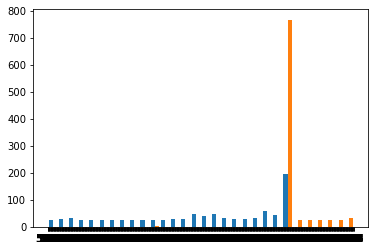

In [46]:
plt.hist(seoul_set, bins=30)
plt.show()

In [48]:
seoul

,S_DT,S_DEATH,SY_TOTAL
0,2022.09.01.00,5251,
1,2022.08.31.00,5228,
2,2022.08.30.00,5218,
3,2022.08.29.00,5212,
4,2022.08.28.00,5202,
...,...,...,...
936,20.02.09.18,0,459
937,20.02.08.18,0,414
938,20.02.07.18,0,322
939,20.02.06.09,0,192


In [34]:
seoul_set = seoul.set_index('S_DT')

In [42]:
seoul_set.resample('M').sum()

,S_DEATH,SY_TOTAL
S_DT,,
2005-02-28,0,0
2005-03-31,0,0
2005-04-30,0,0
2005-05-31,0,0
2005-06-30,0,0
...,...,...
2026-10-31,0,0
2026-11-30,0,0
2026-12-31,0,0


In [47]:
seoul_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941 entries, 2022-09-01 00:00:00 to 2005-02-20 15:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   S_DEATH   941 non-null    object
 1   SY_TOTAL  941 non-null    object
dtypes: object(2)
memory usage: 22.1+ KB


In [41]:
seoul_set.index = pd.to_datetime(seoul_set.index)

In [49]:
seoul_set

,S_DEATH,SY_TOTAL
S_DT,,
2022-09-01 00:00:00,5251,
2022-08-31 00:00:00,5228,
2022-08-30 00:00:00,5218,
2022-08-29 00:00:00,5212,
2022-08-28 00:00:00,5202,
...,...,...
2009-02-20 18:00:00,0,459
2008-02-20 18:00:00,0,414
2007-02-20 18:00:00,0,322


In [54]:
seoul_death

,S_DEATH
0,5251
1,5228
2,5218
3,5212
4,5202
...,...
936,0
937,0
938,0
939,0


In [ ]:
plt.hist(dea, bins=100)
plt.show()